In [1]:
import numpy as np
import math, random

from math import sqrt, cos, sin, pi, atan2, degrees
from numpy import abs

import matplotlib.pyplot as plt

from typing import List, Tuple

from shapely import affinity, distance
from shapely.geometry import Polygon, Point, LinearRing, LineString
from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely.ops import transform

Creating polygon

Model 5-3

In [2]:
vertices = [(4.0, 0.0), (0.0, 4.0), (-4.0, 0.0), (0.0, -4.0), (4.0, 0.0)]
r, rc, R = 4.0, 4.0/sqrt(2), 1.0
pplg = LinearRing(vertices)

delta = 0.4
steps = int((r-rc)/delta)

Solution

In [3]:
opts = []
n = 10000

ppts = []
ppts.append(Point(pplg.coords[0][0], pplg.coords[0][1]))
for i in reversed(range(len(pplg.coords)-1)):
    ppts.append(Point(pplg.coords[i][0], pplg.coords[i][1]))
cplg = LinearRing(ppts)

for i in range(n):
    phi = (i / n)*2.0*pi
    opts.append(Point(r*cos(phi), r*sin(phi)))
oplg = LinearRing(opts)

# plot_line(oplg, add_points=False, color=(1,0,0), alpha=1)
# plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
# plot_line(cplg, add_points=False, color=(0,0,1), alpha=0.4)

# plt.autoscale()
# plt.show()

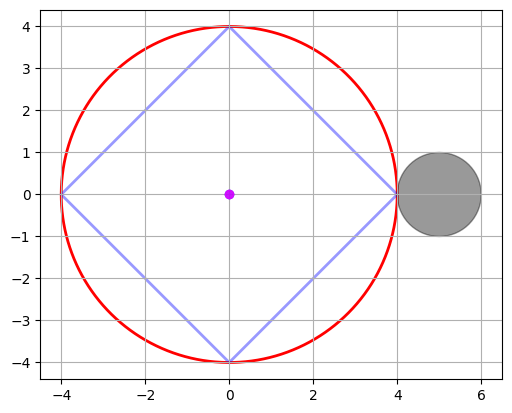

In [4]:
x0, y0, angle = 0.0, 0.0, 0.0
cplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), oplg), angle, origin = (-x0, -y0))
oplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), cplg), angle, origin = (-x0, -y0))
circle = Point(oplgmod.bounds[2]+R, 0.0).buffer(R)

plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplgmod, add_points=False, color=(0,0,1), alpha=0.4)
plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.4)

plt.autoscale()
plt.show()

In [5]:
n = 20000

cpts = []
opts = []
ang = []

maxdst = 0.0
maxi = 0
for i in range(n):
    phi = (i / n)*2.0*pi
    ln = LineString([(x0, y0), (2*r*cos(phi), 2*r*sin(phi))])
    cpt = cplg.intersection(ln)
    opt = oplg.intersection(ln)
    dst = sqrt((opt.x-cpt.x)**2+(opt.y-cpt.y)**2)
    if dst > maxdst:
        maxdst = dst
        maxi = i
    cpts.append(cpt)
    opts.append(opt)
    ang.append(phi)

In [6]:
plgs = []
ptss = []

lpts = []
ltrcpts = []

for j in range(steps+1):
    if j < steps:
        pt = []
        lpt = []
        ltrcpt = []

        h = delta*(j+1)
        c = 2*sqrt(2*r*h-h**2)
        sn = c/(2*r)
        cs = 1.0-h/r
        ang = atan2(sn, cs)
        if ang < 0:
            ang += 2*pi
        
        ang1 = pi/4.0-ang
        ang2 = pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*0.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*pi/2.0
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x+norm.y*R, pt1.y+norm.x*R))
        ltrcpt.append(Point(pt2.x+norm.y*R, pt2.y+norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))

        ang1 = 3*pi/4.0-ang
        ang2 = 3*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*pi/2.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*pi
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x-norm.y*R, pt1.y-norm.x*R))
        ltrcpt.append(Point(pt2.x-norm.y*R, pt2.y-norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))

        ang1 = 5*pi/4.0-ang
        ang2 = 5*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*pi+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*3*pi/2.0
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x+norm.y*R, pt1.y+norm.x*R))
        ltrcpt.append(Point(pt2.x+norm.y*R, pt2.y+norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))

        ang1 = 7*pi/4.0-ang
        ang2 = 7*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*3*pi/2.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*2*pi
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x-norm.y*R, pt1.y-norm.x*R))
        ltrcpt.append(Point(pt2.x-norm.y*R, pt2.y-norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))
        
        lpts.append(lpt)
        ltrcpts.append(ltrcpt)

        ptss.append(pt)
        plgs.append(LinearRing(pt))
    else:
        pt = []
        lpt = []
        ltrcpt = []
        
        for i in range(len(cpts)):
            pt.append(cpts[i])
            
        ptss.append(pt)
        plgs.append(LinearRing(pt))

        lpt.append(Point(r*cos(0.0), r*sin(0.0)))
        lpt.append(Point(r*cos(pi/2.0), r*sin(pi/2.0)))
        lpt.append(Point(r*cos(pi), r*sin(pi)))
        lpt.append(Point(r*cos(3*pi/2.0), r*sin(3*pi/2.0)))
        lpts.append(lpt)

        ltrcpt.append(Point(r*cos(0.0)+R/sqrt(2), r*sin(0.0)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi/2.0)+R/sqrt(2), r*sin(pi/2.0)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi/2.0)-R/sqrt(2), r*sin(pi/2.0)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi)-R/sqrt(2), r*sin(pi)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi)-R/sqrt(2), r*sin(pi)-R/sqrt(2)))
        ltrcpt.append(Point(r*cos(3*pi/2.0)-R/sqrt(2), r*sin(3*pi/2.0)-R/sqrt(2)))
        ltrcpt.append(Point(r*cos(3*pi/2.0)+R/sqrt(2), r*sin(3*pi/2.0)-R/sqrt(2)))
        ltrcpt.append(Point(r*cos(0.0)+R/sqrt(2), r*sin(0.0)-R/sqrt(2)))
        ltrcpts.append(ltrcpt)
    

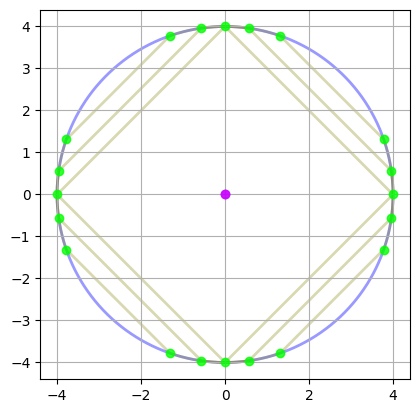

In [7]:
# plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)
# plot_line(cplg, add_points=False, color=(1,0,1), alpha=0.7)
for j in range(steps+1):
    plot_line(plgs[j], add_points=False, color=(0.5,0.5,0), alpha=0.3)

for j in range(len(lpts)):
    plot_points(lpts[j], color=(0,1,0), alpha=0.8)

plt.show()

In [8]:
trcplgs = []

for k in range(steps+1):
    if k < steps:
        trcpts = []

        for i in range(0, 13, 4):
            n = 10000

            # circle
            pt1 = ltrcpts[k][i]
            pt2 = ltrcpts[k][i+1]
            angle1 = math.atan2(pt1.y-lpts[k][int((i)/2)].y, pt1.x-lpts[k][int((i)/2)].x)
            angle2 = math.atan2(pt2.y-lpts[k][int((i)/2)].y, pt2.x-lpts[k][int((i)/2)].x)
            if angle1 < 0.0:
                angle1 += 2.0*math.pi
            if angle2 < 0.0:
                angle2 += 2.0*math.pi

            # circle = []
            for j in range(n): 
                alpha = j / n
                phi = (1-alpha)*angle1+alpha*angle2
                x = R*math.cos(phi)+lpts[k][int((i)/2)].x
                y = R*math.sin(phi)+lpts[k][int((i)/2)].y
                # circle.append((x, y))
                trcpts.append(Point(x, y))
            # circles.append(circle)

            # line
            pt1 = ltrcpts[k][i+1]
            pt2 = ltrcpts[k][i+2]
            # line = []
            for j in range(n): 
                alpha = j / n
                x = (1-alpha)*pt1.x+alpha*pt2.x
                y = (1-alpha)*pt1.y+alpha*pt2.y
                # line.append((x, y))
                trcpts.append(Point(x, y))
            # lines.append(line)

            # circle
            pt1 = ltrcpts[k][i+2]
            pt2 = ltrcpts[k][i+3]
            angle1 = math.atan2(pt1.y-lpts[k][int((i+3)/2)].y, pt1.x-lpts[k][int((i+3)/2)].x)
            angle2 = math.atan2(pt2.y-lpts[k][int((i+3)/2)].y, pt2.x-lpts[k][int((i+3)/2)].x)
            if angle1 < 0.0:
                angle1 += 2.0*math.pi
            if angle2 < 0.0:
                angle2 += 2.0*math.pi
            # circle = []
            for j in range(n): 
                alpha = j / n
                phi = (1-alpha)*angle1+alpha*angle2
                x = R*math.cos(phi)+lpts[k][int((i+3)/2)].x
                y = R*math.sin(phi)+lpts[k][int((i+3)/2)].y
                # circle.append((x, y))
                trcpts.append(Point(x, y))
            # circles.append(circle)

            # circle
            pt1 = ltrcpts[k][i+3]
            if i+4 == len(ltrcpts[k]):
                pt2 = ltrcpts[k][0]
            else:
                pt2 = ltrcpts[k][i+4]
            angle1 = math.atan2(pt1.y, pt1.x)
            angle2 = math.atan2(pt2.y, pt2.x)
            if angle1 < 0.0:
                angle1 += 2.0*math.pi
            if angle2 < 0.0:
                angle2 += 2.0*math.pi

            if angle1 > 3*pi/2.0:
                angle1 -= 2.0*pi

            # circle = []
            for j in range(n): 
                alpha = j / n
                phi = (1-alpha)*angle1+alpha*angle2
                x = (r+R)*math.cos(phi)
                y = (r+R)*math.sin(phi)
                # circle.append((x, y))
                trcpts.append(Point(x, y))
            # circles.append(circle)

        trcplgs.append(LinearRing(trcpts))
    else:
        trcpts = []
        for i in range(0, 7, 2):
            # line
            pt1 = ltrcpts[k][i]
            pt2 = ltrcpts[k][i+1]
            # line = []
            for j in range(n): 
                alpha = j / n
                x = (1-alpha)*pt1.x+alpha*pt2.x
                y = (1-alpha)*pt1.y+alpha*pt2.y
                # line.append((x, y))
                trcpts.append(Point(x, y))
            # lines.append(line)

            # circle
            pt1 = ltrcpts[k][i+1]
            if i+2 == len(ltrcpts[k]):
                pt2 = ltrcpts[k][0]
                angle1 = math.atan2(pt1.y-lpts[k][0].y, pt1.x-lpts[k][0].x)
                angle2 = math.atan2(pt2.y-lpts[k][0].y, pt2.x-lpts[k][0].x)
                if angle1 < 0.0:
                    angle1 += 2.0*math.pi
                if angle2 < 0.0:
                    angle2 += 2.0*math.pi
                
                if angle1 > 3*pi/2.0:
                    angle1 -= 2.0*pi
                # circle = []
                for j in range(n): 
                    alpha = j / n
                    phi = (1-alpha)*angle1+alpha*angle2
                    x = R*math.cos(phi)+lpts[k][0].x
                    y = R*math.sin(phi)+lpts[k][0].y
                    # circle.append((x, y))
                    trcpts.append(Point(x, y))
                # circles.append(circle)
            else:
                pt2 = ltrcpts[k][i+2]
                angle1 = math.atan2(pt1.y-lpts[k][int((i+3)/2)].y, pt1.x-lpts[k][int((i+3)/2)].x)
                angle2 = math.atan2(pt2.y-lpts[k][int((i+3)/2)].y, pt2.x-lpts[k][int((i+3)/2)].x)
                if angle1 < 0.0:
                    angle1 += 2.0*math.pi
                if angle2 < 0.0:
                    angle2 += 2.0*math.pi
                # circle = []
                for j in range(n): 
                    alpha = j / n
                    phi = (1-alpha)*angle1+alpha*angle2
                    x = R*math.cos(phi)+lpts[k][int((i+3)/2)].x
                    y = R*math.sin(phi)+lpts[k][int((i+3)/2)].y
                    # circle.append((x, y))
                    trcpts.append(Point(x, y))
                # circles.append(circle)

        trcplgs.append(LinearRing(trcpts))



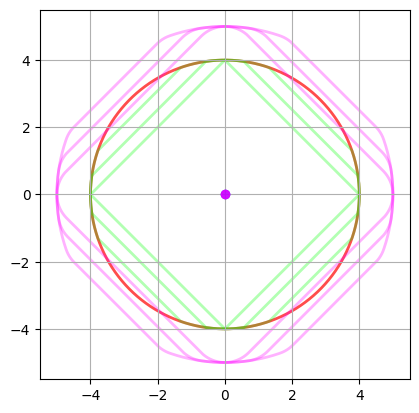

In [9]:
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplg, add_points=False, color=(1,0,0), alpha=0.7)
# plot_line(cplg, add_points=False, color=(1,0,0), alpha=0.7)

for j in range(steps+1):
    plot_line(plgs[j], add_points=False, color=(0,1,0), alpha=0.3)

for j in range(steps+1):
    plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.3)

In [10]:
ln = LineString([(0.0, 0.0), (100.0, 0.0)])
x = []
y = []
dst = []
n = 1000

dst.append(0.0)
for j in range(steps+1):
    pt1 = affinity.rotate(trcplgs[j], 0.0, origin=Point(0.0,0.0)).intersection(ln)
    for i in range(1, n):
        angle = i*360.0/n+360.0*j
        pt2 = affinity.rotate(trcplgs[j], angle, origin=Point(0.0,0.0)).intersection(ln)
        x.append(angle)
        y.append(pt2.x)
        dst.append(dst[-1]+sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2))
        pt1 = pt2

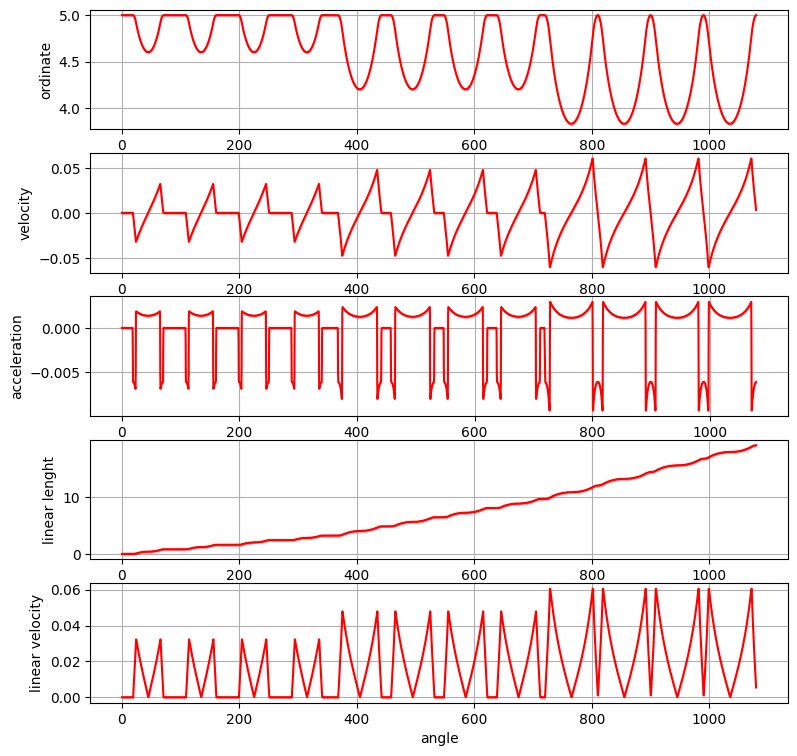

In [11]:
d1 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, y[1:], y)]
d2 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, d1[1:], d1)]
dst1 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, dst[1:], dst)]

fig, axs = plt.subplots(5, 1)
fig.set_size_inches(9.0, 9.0)

axs[0].plot(x, y, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('ordinate')
axs[0].grid(True)

axs[1].plot(x[:-1], d1, marker='.', color="red", markersize=0.1)
axs[1].set_ylabel('velocity')
axs[1].grid(True)

axs[2].plot(x[:-2], d2, marker='.', color="red", markersize=0.1)
axs[2].set_ylabel('acceleration')
axs[2].grid(True)

axs[3].plot(x, dst[:-1], marker='.', color="red", markersize=0.1)
axs[3].set_ylabel('linear lenght')
axs[3].grid(True)

axs[4].plot(x[:-1], dst1, marker='.', color="red", markersize=0.1)
axs[4].set_xlabel('angle')
axs[4].set_ylabel('linear velocity')
axs[4].grid(True)

plt.show()